In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xlrd==1.2.0
import xlrd

     |████████████████████████████████| 103 kB 16.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
import matplotlib.pyplot as plt

In [4]:
categories = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BikeStores.xls', sheet_name='categories')
categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [5]:
brands = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BikeStores.xls', sheet_name='brands')
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [6]:
products = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BikeStores.xls', sheet_name='products')
products

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria

In [7]:
cat_prod = pd.merge(categories, products, how="outer", on=['category_id'])
cat_prod_brands = pd.merge(cat_prod, brands, how="outer", on=['brand_id'])
cat_prod_brands[['product_name', 'brand_name', 'category_name']]

,product_name,brand_name,category_name
0,Electra Cruiser 1 (24-Inch) - 2016,Electra,Children Bicycles
1,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Electra,Children Bicycles
2,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,Electra,Children Bicycles
3,"Electra Girl's Hawaii 1 16"" - 2017",Electra,Children Bicycles
4,Electra Moto 3i (20-inch) - Boy's - 2017,Electra,Children Bicycles
...,...,...,...
316,Surly Straggler - 2018,Surly,Road Bikes
317,Ritchey Timberwolf Frameset - 2016,Ritchey,Mountain Bikes
318,Heller Shagamaw Frame - 2016,Heller,Mountain Bikes
319,Heller Bloodhound Trail - 2018,Heller,Mountain Bikes


2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.

In [8]:
num_prod_per_cat = cat_prod_brands.groupby('category_name').count().reset_index()[['category_name','product_name']]
num_prod_per_cat

,category_name,product_name
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti

In [9]:
num_prod_per_brand = cat_prod_brands.groupby('brand_name').count().reset_index()[['brand_name','product_name']]
num_prod_per_brand

,brand_name,product_name
0,Electra,118
1,Haro,10
2,Heller,3
3,Pure Cycles,3
4,Ritchey,1
5,Strider,3
6,Sun Bicycles,23
7,Surly,25
8,Trek,135


4. i nomi dei prodotti della marca Trek

In [10]:
cat_prod_brands

,category_id,category_name,product_id,product_name,brand_id,model_year,list_price,brand_name
0,1,Children Bicycles,21,Electra Cruiser 1 (24-Inch) - 2016,1,2016.0,269.99,Electra
1,1,Children Bicycles,22,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1,2016.0,269.99,Electra
2,1,Children Bicycles,23,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,1,2016.0,299.99,Electra
3,1,Children Bicycles,95,"Electra Girl's Hawaii 1 16"" - 2017",1,2017.0,299.99,Electra
4,1,Children Bicycles,96,Electra Moto 3i (20-inch) - Boy's - 2017,1,2017.0,349.99,Electra
...,...,...,...,...,...,...,...,...
316,7,Road Bikes,168,Surly Straggler - 2018,8,2018.0,1549.00,Surly
317,6,Mountain Bikes,2,Ritchey Timberwolf Frameset - 2016,5,2016.0,749.99,Ritchey
318,6,Mountain Bikes,5,Heller Shagamaw Frame - 2016,3,2016.0,1320.99,Heller
319,6,Mountain Bikes,131,Heller Bloodhound Trail - 2018,3,2018.0,2599.00,Heller


In [11]:
cat_prod_brands[cat_prod_brands.brand_name == 'Trek'][['product_name']]

,product_name
118,Trek Boy's Kickster - 2015/2017
119,Trek Girl's Kickster - 2017
120,Trek Precaliber 12 Boys - 2017
121,Trek Precaliber 12 Girls - 2017
122,Trek Precaliber 16 Boys - 2017
...,...
248,Trek Checkpoint ALR 5 - 2019
249,Trek Checkpoint ALR 5 Women's - 2019
250,Trek Checkpoint SL 5 Women's - 2019
251,Trek Checkpoint SL 6 - 2019


5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome

In [12]:
cat_prod_brands[cat_prod_brands['category_name'].str.contains('Bikes')][['product_name']]

,product_name
113,Electra Loft Go! 8i - 2018
114,Electra Townie Go! 8i - 2017/2018
115,Electra Townie Go! 8i Ladies' - 2018
116,Electra Townie Commute Go! - 2018
117,Electra Townie Commute Go! Ladies' - 2018
...,...
316,Surly Straggler - 2018
317,Ritchey Timberwolf Frameset - 2016
318,Heller Shagamaw Frame - 2016
319,Heller Bloodhound Trail - 2018


6. la categoria che ha il prodotto che costa di più

In [13]:
cost_max = cat_prod_brands[cat_prod_brands['list_price'] == cat_prod_brands['list_price'].max()][['category_name']]
cost_max

,category_name
222,Road Bikes


7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti

In [25]:
brand_maggiore_100= cat_prod_brands.groupby('brand_name').count().reset_index()
brand_maggiore_100 = brand_maggiore_100[brand_maggiore_100['product_name']>=100][['brand_name','product_name']]
brand_maggiore_100

,brand_name,product_name
0,Electra,118
8,Trek,135


8. la marca del prodotto 'Electra Townie Original 21D - 2016'

In [15]:
cat_prod_brands[cat_prod_brands['product_name'] == 'Electra Townie Original 21D - 2016']['brand_name']

28    Electra
49    Electra
Name: brand_name, dtype: object

9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti

In [34]:
num_prod_per_anno = cat_prod_brands.groupby('model_year').count().reset_index()[['model_year', 'product_name']]
num_prod_per_anno

,model_year,product_name
0,2016.0,25
1,2017.0,85
2,2018.0,195
3,2019.0,6


Visualizzare i grafici più adatti per le richieste 2, 3, 7 e 9

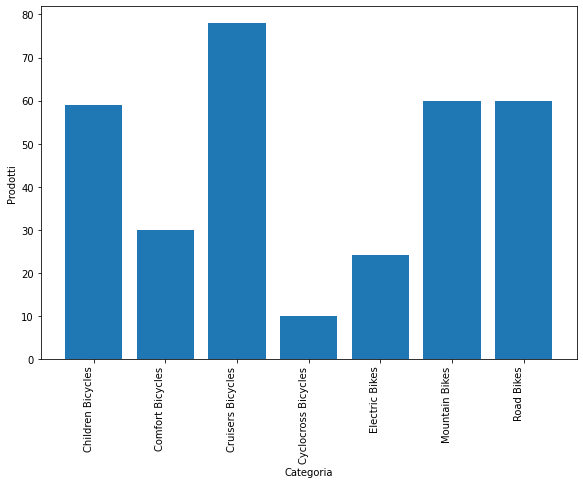

In [30]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Categoria')
ax.set_ylabel('Prodotti')
ax.bar(num_prod_per_cat['category_name'],num_prod_per_cat['product_name'])
plt.show()

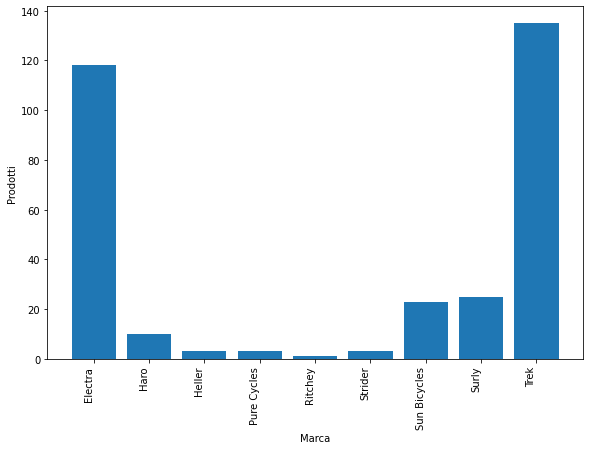

In [31]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Marca')
ax.set_ylabel('Prodotti')
ax.bar(num_prod_per_brand['brand_name'],num_prod_per_brand['product_name'])
plt.show()

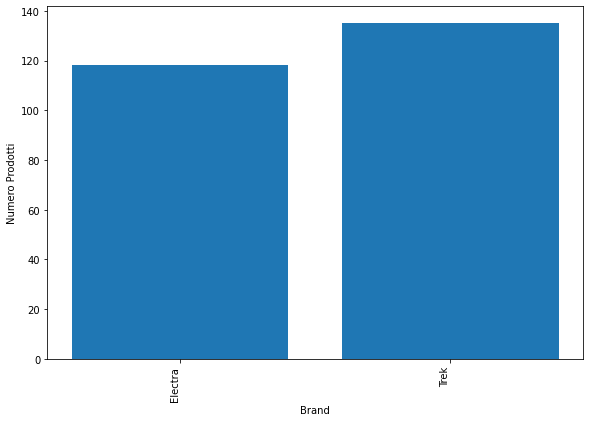

In [33]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Brand')
ax.set_ylabel('Numero Prodotti')
ax.bar(brand_maggiore_100['brand_name'],brand_maggiore_100['product_name'])
plt.show()

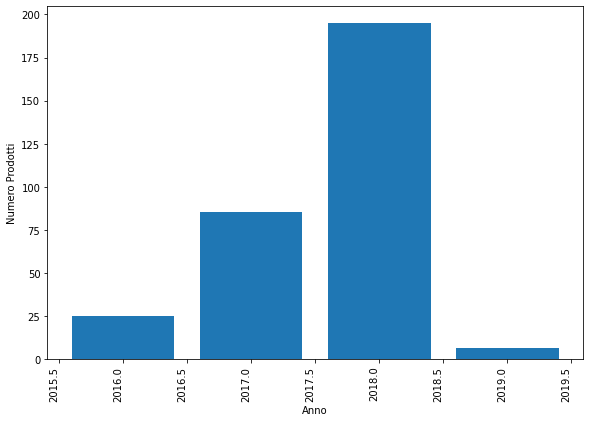

In [36]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Anno')
ax.set_ylabel('Numero Prodotti')
ax.bar(num_prod_per_anno['model_year'],num_prod_per_anno['product_name'])
plt.show()